# Pipeline workflow
Pieplines are used to automate a machine learning workflow. Pipeline() allows us to chain several transformations for a model. For example, chaining a scaling, feature reduction and a classifier together. 

In [20]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4) 
plt.rcParams['axes.titlesize'] = 'large'

### 1. Validation dataset 

In [14]:
#load data
data = pd.read_csv('data.csv', index_col=False)
data.drop('id',axis=1, inplace=True)

# Split features from labels 
array = data.values
X = array[:,1:31]
y = array[:,0]

# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Converting to numeric labels 
le = LabelEncoder()
y = le.fit_transform(y)

### 2 Model Evaluation: baseline
useful read: https://en.m.wikipedia.org/wiki/Bootstrapping_(statistics)

In [15]:
# creating a list of the models to be evaluated 
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))

In [16]:
# Evaluation metric Initializations
num_folds = 10
num_instances = len(X_train)
seed = 0 
scoring =  'accuracy'

results = []
names = []

for name, model in models:
 kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
 cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 output = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(output)
print('-> 10-Fold cross-validation accurcay score')

LR: 0.944808 (0.029070)
LDA: 0.957372 (0.029611)
KNN: 0.929872 (0.036675)
CART: 0.917179 (0.044816)
NB: 0.934679 (0.044038)
SVM: 0.605769 (0.073092)
-> 10-Fold cross-validation accurcay score


* ####  The above results show that Linear Regression and Linear Discriminant Analysis have potential for excellent performance and might be worth inspecting more
* ####  looking at the distribution of accuracy values  across Cross Validation folds might give a better idea. Box plots are usually used for this task.

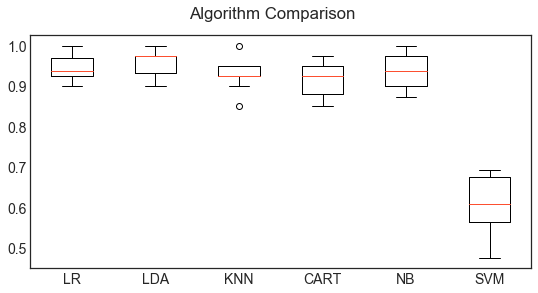

In [17]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### The above boxplots show similar tight distribuation amongest cliassifiers, except for the SVM which shows low variance. This is unexpected results from the SVM given the results in the previous Notebooks. Let's try the same test later with a Standardized version of the data 

### 2.1 Model Evaluation: Standardize Data using StandardScaler()

In [23]:
# Standardize the dataset
pipelines = []
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
    LogisticRegression())])))
pipelines.append(( 'ScaledLDA' , Pipeline([( 'Scaler' , StandardScaler()),( 'LDA' ,
    LinearDiscriminantAnalysis())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
    KNeighborsClassifier())])))
pipelines.append(( 'ScaledCART' , Pipeline([( 'Scaler' , StandardScaler()),( 'CART' ,
    DecisionTreeClassifier())])))
pipelines.append(( 'ScaledNB' , Pipeline([( 'Scaler' , StandardScaler()),( 'NB' ,
    GaussianNB())])))
pipelines.append(( 'ScaledSVM' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVM' , SVC())])))


results = []
names = []
for name, model in pipelines:
  kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  output = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(output)

SyntaxError: invalid syntax (<ipython-input-23-4b2fdda9ce86>, line 1)

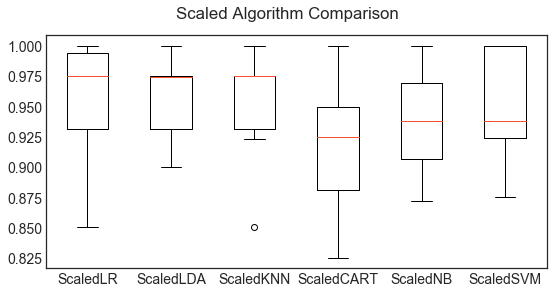

In [19]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Examining the above results shows the effect of scaling the data on the performance of the SVM. Before introducing this scaler SVM perfmance was the worst amongest the model. The three models the show the best potentials are SVM,  LDA and LR 

## 3 Parameter tuning: SVC

## to be continued soon